# Task-1 : Implement VGG16 on Food101 dataset.
First task would be to implement the VGG16 architecture model class and train a classification model on the Food101 dataset using the above architecture. The details of the dataset are given below.  

### 1.1 Import packages
Some packages are imported. However, we would need to import any other package that is required in the implementation that we feel is required. 

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
from tqdm.auto import tqdm

### 1.2. Dataset
The Food-101 is a challenging data set of 101 food categories with 101,000 images. All images were rescaled to have a maximum side length of 512 pixels. Implementing the below cell will allow you to download the dataset into your colab directory under ```/data/food-101```.
Inside the directory you would find the information about the dataset and also a ReadMe.txt file.

Now, the image size of the dataset is ```(512,512,3)```. However, the model expects the image to be of the size ```(224,224,3)```. Now using the transforms method, write a composed transformation where you implement the resize as well as convert to tensor function. Do some basic preprocessing as well, Normalisation, Standardization etc. \
Hint : use the ``` transform.Compose() ``` method.




### Declare transformations

In [2]:
### YOUR CODE STARTS HERE ###

normalize = transforms.Normalize(
    mean=[0.4914, 0.4822, 0.4465],
    std=[0.2023, 0.1994, 0.2010],
)
# define transforms
transform = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(),
])

### YOUR CODE ENDS HERE ###

In [3]:
# Setup training data
train_data = datasets.Food101(
    root="data",
    split="train", # get training data
    download=True,
    transform=transform
)

# Setup testing data
test_data = datasets.Food101(
    root="data",
    split="test", # get test data
    download=True,
    transform=transform
)

### Length of the Train & Test Set

In [4]:
print(f'Length of the training data: {len(train_data)}')
print(f'Length of the testing data: {len(test_data)}')

Length of the training data: 75750
Length of the testing data: 25250


### Number of classes and their mapping

In [5]:
# train_set

print(train_data.classes[0:8])
print(f'\nTotal classes in the dataset: {len(train_data.classes)}')

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap']

Total classes in the dataset: 101


In [6]:
list( train_data.class_to_idx.items() )[0:8]

[('apple_pie', 0),
 ('baby_back_ribs', 1),
 ('baklava', 2),
 ('beef_carpaccio', 3),
 ('beef_tartare', 4),
 ('beet_salad', 5),
 ('beignets', 6),
 ('bibimbap', 7)]

### Check Image Dimenstion

In [7]:
# Pick a random sample

image, label = train_data[0]
print(f'Image Dimension in Train set: {image.shape}')

Image Dimension in Train set: torch.Size([3, 224, 224])


In [8]:
# Pick a random sample

image, label = test_data[0]
print(f'Image Dimension in Test set: {image.shape}')

Image Dimension in Test set: torch.Size([3, 224, 224])


In [9]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

For visualization, we randomly select 10 classes of the dataset and plot corresponding images.

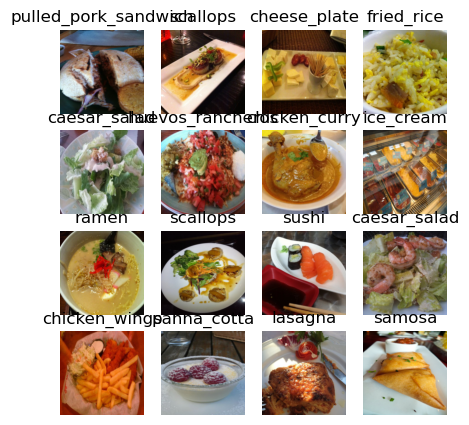

In [10]:
torch.manual_seed(42)
fig = plt.figure(figsize=(5, 5))
rows, cols = 4, 4
class_names = train_data.classes
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.permute(1, 2, 0))
    plt.title(class_names[label])
    plt.axis(False);

In [11]:
def accuracy_fn(y_true, y_pred):
    
    correct = torch.eq(y_true, y_pred).sum().item()
    accuracy = ( correct/len(y_pred) ) * 100
    
    return accuracy

### 1.3. Prepare Dataloader
Now, in the cell below implement the DataLoader function for the train and test data. You then have to print the length of the train and test dataloaders.

In [12]:
from torch.utils.data import DataLoader

BATCH_SIZE = 128

### YOUR CODE STARTS HERE ###
train_dataloader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)

### YOUR CODE ENDS HERE ###
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 592 batches of 128
Length of test dataloader: 198 batches of 128


### 1.4. ResNet18 Architecture
Now, create a model class and implement the ResNet18 architecture. The architecture layer is as follows :
![Alt text](https://dl.acm.org/cms/attachment/html/10.1145/3613917.3613922/assets/html/images/icmssp2023-5-fig2.jpg)

ResNet18 takes input tensor size as 224, 244 with 3 RGB channel. It has 17 convolutional layers,1 Max pooling, 1 Avg. Pooling layers, and 1 Dense layers which sum up to 18 layers.



Implement the model class in the given cell below. DONOT change the class name as that would be required in the next cell.

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Task-2 : Finetuning ResNet18
In this task, you would use the concept of transfer learning to train a pretrained model of Resnet18 on the Food101 dataset. You would use the pretrained model of Resnet18 from the pytorch library and use a classification head having the number of classes same as given in the dataset(as like above). Use cross entropy loss and SGD optimizer to train on the training data. Report the accuracy measure of the previous model (from scratch) and this finetuned version.

Ref: https://www.kaggle.com/code/francescolorenzo/96-fine-tuning-resnet34-with-pytorch

In [14]:
import torchvision.models as models

In [15]:
resnet_pretrained = torchvision.models.resnet18(pretrained=True)

In [16]:
resnet_pretrained

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [17]:
# Freeze the weights of the early layers

# How it works ? Here we have freezed the weights of all the layers including the early residual_blocks and the ending classifier. 
# But we will remove the exisiting classifier and then add our own classifier according to our number of classes, so this classifiers parameters
# will not be freezed, hence it will be trained.

# Hence at the end we freezed only the early layers, but the end classifiers layers will be trainable.
for param in resnet_pretrained.parameters():
    param.requires_grad = False

In [18]:
resnet_pretrained.fc

Linear(in_features=512, out_features=1000, bias=True)

In [19]:
custom_classifier_stack = nn.Sequential(
    nn.Linear(in_features = 512, out_features = 1000),
    nn.ReLU(),
    # nn.Dropout(p = 0.5),
    
    nn.Linear(in_features = 1000, out_features = 101),
)

resnet_pretrained.fc = custom_classifier_stack

In [20]:
resnet_pretrained.fc

Sequential(
  (0): Linear(in_features=512, out_features=1000, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1000, out_features=101, bias=True)
)

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

#### Initialise loss & optimizer for the pretrained model

In [22]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = resnet_pretrained.parameters(), lr = 0.01)

In [23]:
num_classes = 101
num_epochs = 8
performance_metrics_pretrained = []
model = resnet_pretrained.to(device)
best_accuracy = 0

for epoch in tqdm(range(num_epochs)):
    model.train()
    train_loss = 0
    
    for batch_idx, (X, y) in enumerate(train_dataloader):
        
        X, y = X.to(device), y.to(device)
        
        y_pred = model(X)
                
        # calculate batch accumulative loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
    with torch.inference_mode():
        model.eval()
        test_loss, test_accuracy = 0,0
        
        for X_test, y_test in test_dataloader:
            
            X_test, y_test = X_test.to(device), y_test.to(device)
            
            y_test_pred = model(X_test)
            
            loss = loss_fn(y_test_pred, y_test)
            test_loss += loss
            test_accuracy += accuracy_fn(y_test, y_test_pred.argmax(dim=1))
        
        # Calculate avg. loss & accuracy
        train_loss = train_loss/len(train_dataloader)
        test_loss = test_loss/len(test_dataloader)
        test_accuracy = test_accuracy/len(test_dataloader)
        
        print(f"Epoch:{epoch+1} | train loss: {train_loss} | test loss: {test_loss} | test accuracy: {test_accuracy}")
        performance_metrics_pretrained.append(test_accuracy)

        if test_accuracy > best_accuracy:
            torch.save(model, './resNet18_finetuned_best_chkpt_with_init_layer_freeze.pt')
            print('\nModel Checkpoint Saved')
            best_accuracy = test_accuracy
        
print("\nFinetuning Finished")

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch:1 | train loss: 4.303551197052002 | test loss: 3.8442575931549072 | test accuracy: 27.76965426322044

Model Checkpoint Saved
Epoch:2 | train loss: 3.461273670196533 | test loss: 2.974843978881836 | test accuracy: 39.05646538918597

Model Checkpoint Saved
Epoch:3 | train loss: 2.832432985305786 | test loss: 2.489739179611206 | test accuracy: 44.161281937017236

Model Checkpoint Saved
Epoch:4 | train loss: 2.50616717338562 | test loss: 2.240461587905884 | test accuracy: 47.29510175282234

Model Checkpoint Saved
Epoch:5 | train loss: 2.327836036682129 | test loss: 2.0988802909851074 | test accuracy: 49.15863599227569

Model Checkpoint Saved
Epoch:6 | train loss: 2.2149243354797363 | test loss: 2.009718179702759 | test accuracy: 50.29685643196673

Model Checkpoint Saved
Epoch:7 | train loss: 2.1368355751037598 | test loss: 1.9390273094177246 | test accuracy: 51.691779931669636

Model Checkpoint Saved
Epoch:8 | train loss: 2.078246593475342 | test loss: 1.8948733806610107 | test accur

### 1.6. Evaluate the model
Load the trained model and evaluate on the test data.

In [24]:
# Evaluation

# Load the latest Best checkpoint saved above.
model = torch.load('./resNet18_finetuned_best_chkpt_with_init_layer_freeze.pt').to(device)

with torch.inference_mode():
    model.eval()
    test_loss, test_accuracy = 0,0

    for X_test, y_test in tqdm(test_dataloader):

        X_test, y_test = X_test.to(device), y_test.to(device)

        y_test_pred = model(X_test)

        loss = loss_fn(y_test_pred, y_test)
        test_loss += loss
        test_accuracy += accuracy_fn(y_test, y_test_pred.argmax(dim=1))

    # Calculate avg. loss & accuracy
    test_loss = test_loss/len(test_dataloader)
    test_accuracy = test_accuracy/len(test_dataloader)

    print(f"Test loss: {test_loss} | Test accuracy: {test_accuracy}")

  0%|          | 0/198 [00:00<?, ?it/s]

Test loss: 1.8927748203277588 | Test accuracy: 52.72671568627451
